# Handwritten digits classification using neural network
In this project, we will classify handwritten digits using a simple neural network which has only input and output layers. 
We will than add a hidden layer and see how the performance of the model improves.

lets get started !!!

In [57]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import the handwritten digit data from keras 

In [58]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [59]:
X_train.shape

(60000, 28, 28)

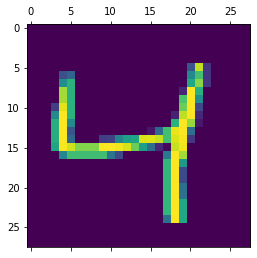

In [60]:
plt.matshow(X_train[2])

In [23]:
y_train[2]

4

In [61]:
X_train = X_train / 255
X_test = X_test / 255

In [62]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [63]:
X_train.shape

(60000, 28, 28)

In [ ]:
#converting 3Darrays to 2D


In [112]:
X_train_flatt = X_train.reshape(len(X_train),28*28)
X_test_flatt = X_test.reshape(len(X_test),28*28)
X_test_flatt.shape

(10000, 784)

In [65]:
X_test_flatt[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [107]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flatt, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2877 - accuracy: 0.9202
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1324 - accuracy: 0.9621
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0951 - accuracy: 0.9725
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0737 - accuracy: 0.9776
Epoch 5/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0585 - accuracy: 0.9822


In [ ]:
#Evaluating on Test data

In [108]:
model.evaluate(X_test_flatt, y_test)

10000/10000 [==============================] - 0s 40us/sample - loss: 0.0809 - accuracy: 0.9744


[0.08089477803660557, 0.9744]

In [95]:
y_predicted = model.predict(X_test_flatt)
y_predicted[0]

array([2.3846962e-08, 7.6750188e-09, 4.5346351e-06, 1.2612052e-04,
       1.0618858e-09, 1.8767745e-06, 3.8650612e-09, 5.0111794e-01,
       1.8991418e-06, 1.5650566e-06], dtype=float32)

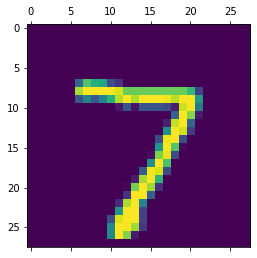

In [96]:
plt.matshow(X_test[0])

In [97]:
np.argmax(y_predicted[0])

7

In [117]:
#checking predicted and actual values are correct or not

In [86]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [99]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
# checking accuracy metric in Confucsion matrix

In [98]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    2,    1,    0,    3,    4,    2,    1,    0],
       [   0, 1126,    2,    1,    0,    1,    3,    1,    1,    0],
       [   8,    2,  986,    5,    4,    0,    6,    7,   13,    1],
       [   1,    0,    4,  980,    0,    3,    0,    9,    7,    6],
       [   0,    0,    3,    0,  942,    0,    9,    2,    2,   24],
       [   4,    1,    1,   18,    3,  838,    8,    2,   10,    7],
       [   5,    2,    1,    0,    3,    6,  937,    0,    4,    0],
       [   0,    6,    8,    3,    2,    1,    0,  989,    0,   19],
       [   5,    3,    2,    6,    5,    4,    3,    5,  936,    5],
       [   3,    4,    0,    9,   12,    1,    1,    7,    0,  972]])>

In [ ]:
# visualizing the same with seaborn lib

Text(69.0, 0.5, 'Truth')

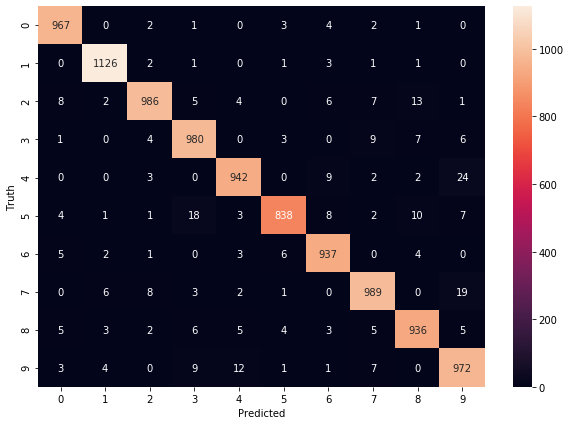

In [100]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [114]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.3015 - accuracy: 0.9159
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1448 - accuracy: 0.9581
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1029 - accuracy: 0.9692
Epoch 4/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0788 - accuracy: 0.9766
Epoch 5/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0632 - accuracy: 0.9808


In [116]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.0832 - accuracy: 0.9740


[0.08317073213402182, 0.974]